In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leitura dos arquivos com separador adequado e encoding
carlsen = pd.read_csv(r"D:/Projetos/analise_xadrez/Data/Carlsen.csv", sep=';', encoding='latin1', engine='python')
caruana = pd.read_csv(r"D:/Projetos/analise_xadrez/Data/Caruana.csv", sep=';', encoding='latin1', engine='python')
gukesh = pd.read_csv(r"D:/Projetos/analise_xadrez/Data/Gukesh.csv", sep=';', encoding='latin1', engine='python')


In [2]:
def calcular_estatisticas(df, jogador):
    total = len(df)
    vit_b = len(df[(df["white"] == jogador) & (df["result"] == "Vitoria")])
    vit_p = len(df[(df["black"] == jogador) & (df["result"] == "Vitoria")])
    emp_b = len(df[(df["white"] == jogador) & (df["result"] == "Empate")])
    emp_p = len(df[(df["black"] == jogador) & (df["result"] == "Empate")])
    der_b = len(df[(df["white"] == jogador) & (df["result"] == "Derrota")])
    der_p = len(df[(df["black"] == jogador) & (df["result"] == "Derrota")])
    return {
        "total_partidas": total,
        "vitorias_brancas": vit_b,
        "vitorias_pretas": vit_p,
        "empates_brancas": emp_b,
        "empates_pretas": emp_p,
        "derrotas_brancas": der_b,
        "derrotas_pretas": der_p,
    }

# Gerar estatísticas
estat_carlsen = calcular_estatisticas(carlsen, "Carlsen")
estat_caruana = calcular_estatisticas(caruana, "Caruana")
estat_gukesh = calcular_estatisticas(gukesh, "Gukesh")

In [3]:
# Exibir resultados
print("Carlsen:", estat_carlsen)
print("Caruana:", estat_caruana)
print("Gukesh:", estat_gukesh)



Carlsen: {'total_partidas': 500, 'vitorias_brancas': 161, 'vitorias_pretas': 111, 'empates_brancas': 60, 'empates_pretas': 82, 'derrotas_brancas': 37, 'derrotas_pretas': 49}
Caruana: {'total_partidas': 500, 'vitorias_brancas': 124, 'vitorias_pretas': 104, 'empates_brancas': 69, 'empates_pretas': 79, 'derrotas_brancas': 51, 'derrotas_pretas': 73}
Gukesh: {'total_partidas': 149, 'vitorias_brancas': 20, 'vitorias_pretas': 24, 'empates_brancas': 35, 'empates_pretas': 29, 'derrotas_brancas': 21, 'derrotas_pretas': 20}


In [4]:
# Montar dataframe com os dados agregados
dados = {
    'Jogador': ['Carlsen', 'Caruana', 'Gukesh'],
    'Total de Partidas': [estat_carlsen['total_partidas'], estat_caruana['total_partidas'], estat_gukesh['total_partidas']],
    'Vitórias': [
        estat_carlsen['vitorias_brancas'] + estat_carlsen['vitorias_pretas'],
        estat_caruana['vitorias_brancas'] + estat_caruana['vitorias_pretas'],
        estat_gukesh['vitorias_brancas'] + estat_gukesh['vitorias_pretas']
    ],
    'Derrotas': [
        estat_carlsen['derrotas_brancas'] + estat_carlsen['derrotas_pretas'],
        estat_caruana['derrotas_brancas'] + estat_caruana['derrotas_pretas'],
        estat_gukesh['derrotas_brancas'] + estat_gukesh['derrotas_pretas']
    ],
    'Empates': [
        estat_carlsen['empates_brancas'] + estat_carlsen['empates_pretas'],
        estat_caruana['empates_brancas'] + estat_caruana['empates_pretas'],
        estat_gukesh['empates_brancas'] + estat_gukesh['empates_pretas']
    ],
    'Vitórias Brancas': [estat_carlsen['vitorias_brancas'], estat_caruana['vitorias_brancas'], estat_gukesh['vitorias_brancas']],
    'Vitórias Pretas': [estat_carlsen['vitorias_pretas'], estat_caruana['vitorias_pretas'], estat_gukesh['vitorias_pretas']],
    'Derrotas Brancas': [estat_carlsen['derrotas_brancas'], estat_caruana['derrotas_brancas'], estat_gukesh['derrotas_brancas']],
    'Derrotas Pretas': [estat_carlsen['derrotas_pretas'], estat_caruana['derrotas_pretas'], estat_gukesh['derrotas_pretas']],
    'Empates Brancas': [estat_carlsen['empates_brancas'], estat_caruana['empates_brancas'], estat_gukesh['empates_brancas']],
    'Empates Pretas': [estat_carlsen['empates_pretas'], estat_caruana['empates_pretas'], estat_gukesh['empates_pretas']],
}

df_stats = pd.DataFrame(dados)
df_stats.set_index('Jogador', inplace=True)
df_stats


,Total de Partidas,Vitórias,Derrotas,Empates,Vitórias Brancas,Vitórias Pretas,Derrotas Brancas,Derrotas Pretas,Empates Brancas,Empates Pretas
Jogador,,,,,,,,,,
Carlsen,500,272,86,142,161,111,37,49,60,82
Caruana,500,228,124,148,124,104,51,73,69,79
Gukesh,149,44,41,64,20,24,21,20,35,29


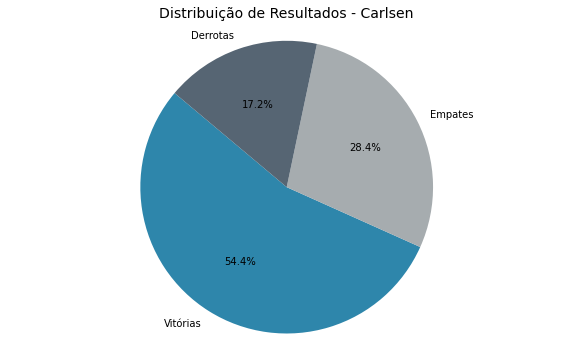

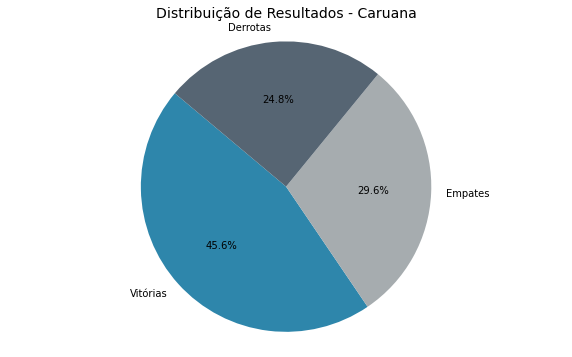

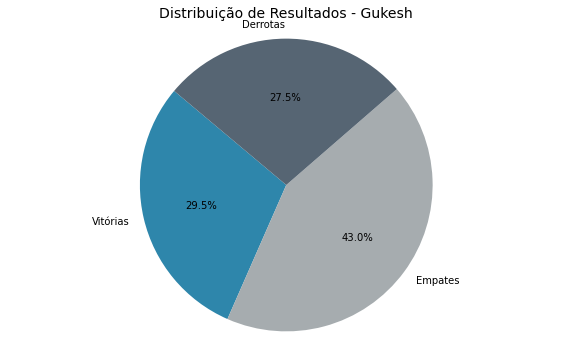

In [5]:
def plot_pizza(stats_dict, jogador):
    labels = ['Vitórias', 'Empates', 'Derrotas']
    sizes = [
        stats_dict['vitorias_brancas'] + stats_dict['vitorias_pretas'],
        stats_dict['empates_brancas'] + stats_dict['empates_pretas'],
        stats_dict['derrotas_brancas'] + stats_dict['derrotas_pretas']
    ]
    colors = ['#2E86AB', '#A6ACAF', '#566573']

    plt.figure(figsize=(10, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribuição de Resultados - {jogador}', fontsize=14)
    plt.axis('equal')
    plt.show()

plot_pizza(estat_carlsen, 'Carlsen')
plot_pizza(estat_caruana, 'Caruana')
plot_pizza(estat_gukesh, 'Gukesh')


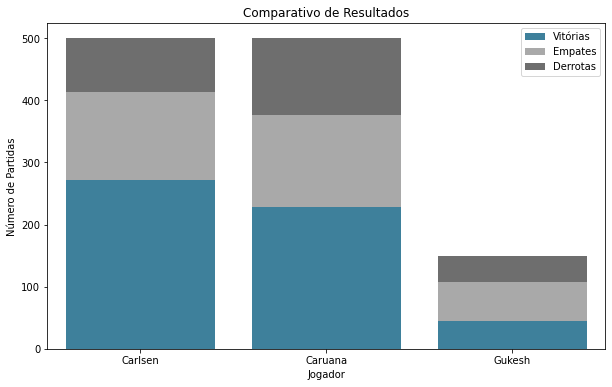

In [6]:
df_plot = df_stats.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x='Jogador', y='Vitórias', color='#2E86AB', label='Vitórias')
sns.barplot(data=df_plot, x='Jogador', y='Empates', color='#A9A9A9', label='Empates', bottom=df_plot['Vitórias'])
sns.barplot(data=df_plot, x='Jogador', y='Derrotas', color='#6E6E6E', label='Derrotas',
            bottom=df_plot['Vitórias'] + df_plot['Empates'])

plt.title('Comparativo de Resultados')
plt.ylabel('Número de Partidas')
plt.legend()
plt.show()


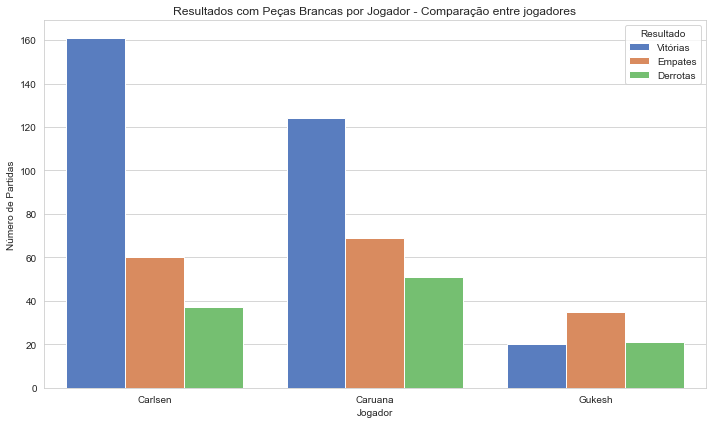

In [7]:
df_brancas = df_stats[['Vitórias Brancas', 'Empates Brancas', 'Derrotas Brancas']].copy()
df_brancas = df_brancas.rename(columns={
    'Vitórias Brancas': 'Vitórias',
    'Empates Brancas': 'Empates',
    'Derrotas Brancas': 'Derrotas'
})

# Resetar índice para plotagem com Seaborn
df_brancas = df_brancas.reset_index()

# Transformar em formato longo para seaborn
df_melt = df_brancas.melt(id_vars='Jogador', var_name='Resultado', value_name='Quantidade')

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(data=df_melt, x='Jogador', y='Quantidade', hue='Resultado', palette='muted')

plt.title('Resultados com Peças Brancas por Jogador - Comparação entre jogadores')
plt.xlabel('Jogador')
plt.ylabel('Número de Partidas')
plt.legend(title='Resultado')
plt.tight_layout()
plt.show()

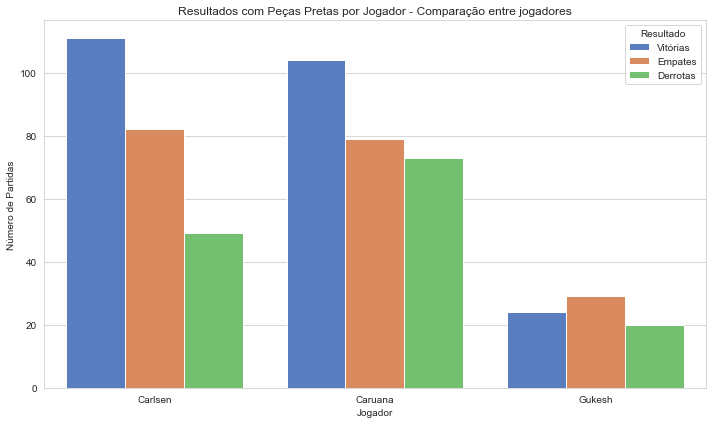

In [8]:
# Reorganizando o DataFrame apenas com os dados das peças pretas
df_pretas = df_stats[['Vitórias Pretas', 'Empates Pretas', 'Derrotas Pretas']].copy()
df_pretas = df_pretas.rename(columns={
    'Vitórias Pretas': 'Vitórias',
    'Empates Pretas': 'Empates',
    'Derrotas Pretas': 'Derrotas'
})

# Resetar índice para plotagem com Seaborn
df_pretas = df_pretas.reset_index()

# Transformar em formato longo para seaborn
df_melt_pretas = df_pretas.melt(id_vars='Jogador', var_name='Resultado', value_name='Quantidade')

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(data=df_melt_pretas, x='Jogador', y='Quantidade', hue='Resultado', palette='muted')

plt.title('Resultados com Peças Pretas por Jogador - Comparação entre jogadores')
plt.xlabel('Jogador')
plt.ylabel('Número de Partidas')
plt.legend(title='Resultado')
plt.tight_layout()
plt.show()

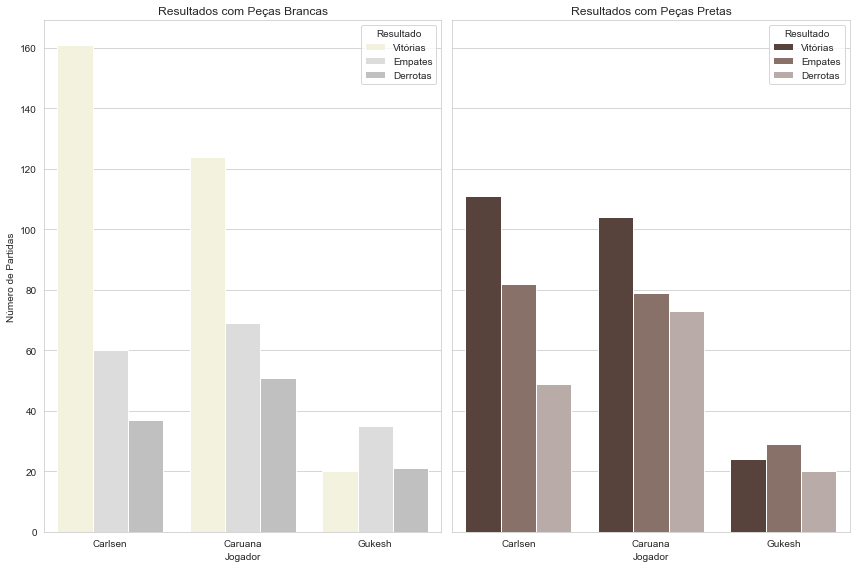

In [9]:
# ===== Preparar dados para peças brancas =====
df_brancas = df_stats[['Vitórias Brancas', 'Empates Brancas', 'Derrotas Brancas']].copy()
df_brancas = df_brancas.rename(columns={
    'Vitórias Brancas': 'Vitórias',
    'Empates Brancas': 'Empates',
    'Derrotas Brancas': 'Derrotas'
})
df_brancas = df_brancas.reset_index()
df_melt_brancas = df_brancas.melt(id_vars='Jogador', var_name='Resultado', value_name='Quantidade')

# ===== Preparar dados para peças pretas =====
df_pretas = df_stats[['Vitórias Pretas', 'Empates Pretas', 'Derrotas Pretas']].copy()
df_pretas = df_pretas.rename(columns={
    'Vitórias Pretas': 'Vitórias',
    'Empates Pretas': 'Empates',
    'Derrotas Pretas': 'Derrotas'
})
df_pretas = df_pretas.reset_index()
df_melt_pretas = df_pretas.melt(id_vars='Jogador', var_name='Resultado', value_name='Quantidade')

# ===== Criar os dois gráficos lado a lado =====
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 8), sharey=True)

# Paletas específicas
palette_brancas = {
    'Vitórias': '#F5F5DC',  # Creme (bege claro)
    'Empates': '#DCDCDC',   # Cinza claro para contraste
    'Derrotas': '#C0C0C0'   # Cinza médio
}

palette_pretas = {
    'Vitórias': '#5D4037',  # Marrom escuro
    'Empates': '#8D6E63',   # Marrom médio
    'Derrotas': '#BCAAA4'   # Marrom claro
}

# Gráfico das peças brancas
sns.barplot(data=df_melt_brancas, x='Jogador', y='Quantidade', hue='Resultado', ax=axes[0], palette=palette_brancas)
axes[0].set_title('Resultados com Peças Brancas')
axes[0].set_xlabel('Jogador')
axes[0].set_ylabel('Número de Partidas')
axes[0].legend(title='Resultado')

# Gráfico das peças pretas
sns.barplot(data=df_melt_pretas, x='Jogador', y='Quantidade', hue='Resultado', ax=axes[1], palette=palette_pretas)
axes[1].set_title('Resultados com Peças Pretas')
axes[1].set_xlabel('Jogador')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

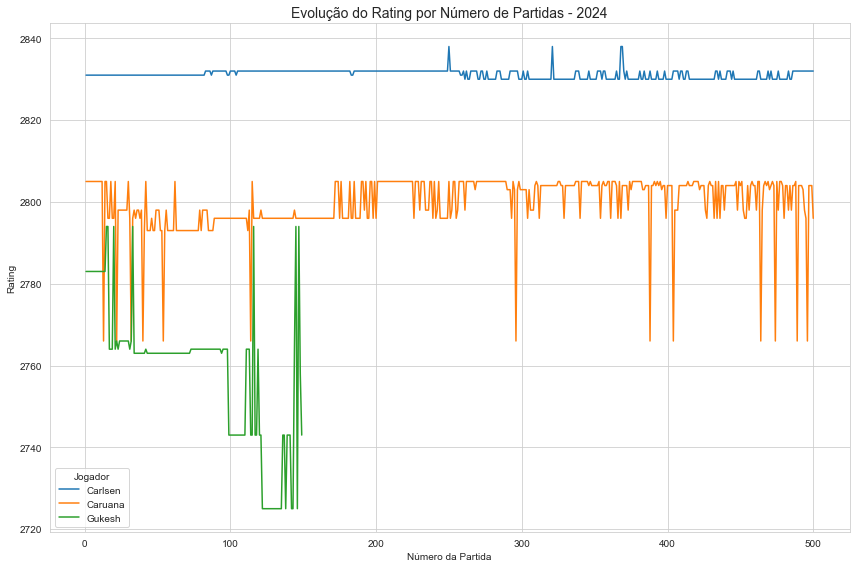

In [10]:
def preparar_elo_por_partida(df, nome_jogador):
    df = df.copy()
    df['Elo'] = df.apply(
        lambda row: row['white_elo'] if row['white'] == nome_jogador else row['black_elo'],
        axis=1
    )
    df = df[['Elo']].reset_index(drop=True)
    df['Partida'] = df.index + 1
    df['Jogador'] = nome_jogador
    return df

# Preparar os dados com suas variáveis
elo_carlsen = preparar_elo_por_partida(carlsen, 'Carlsen')
elo_caruana = preparar_elo_por_partida(caruana, 'Caruana')
elo_gukesh = preparar_elo_por_partida(gukesh, 'Gukesh')

# Unir os dados
df_elo = pd.concat([elo_carlsen, elo_caruana, elo_gukesh])

# Gráfico de linha sem marcadores
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_elo, x='Partida', y='Elo', hue='Jogador')
plt.title('Evolução do Rating por Número de Partidas - 2024', fontsize=14)
plt.xlabel('Número da Partida')
plt.ylabel('Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

